# Data Analysis & Modelling - Loan Acceptance

In this notebook i'm doing a data analysis and modelling of loan acceptance data.

Data from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Loading data

First i'm loading the dataset and giving a high level overview

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/loans-data.csv', index_col=0)

In [2]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 12)

In [6]:
df.fillna(df.mean(), inplace=True)

## Data Exploration

In the next sections i'm exploring the dataset a bit, look at values and relations of the variables in the data.

## Dependents

Let's have a look at the variable *Dependents* and it's relation with loan acceptance

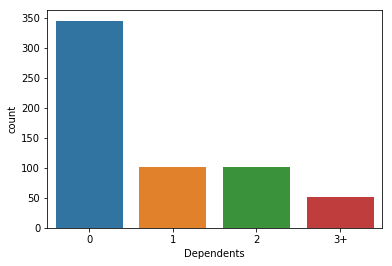

In [7]:
import seaborn as sns

%matplotlib inline

_ = sns.countplot(x=df['Dependents'])

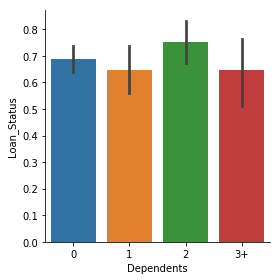

In [8]:
_ = sns.factorplot(x="Dependents", y="Loan_Status", data=df, kind='bar')

## Gender

Second thing i'm curious about is gender. Would (fe-)males get accepted easier for a loan?

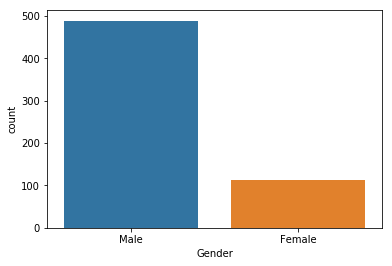

In [9]:
_ = sns.countplot(x=df['Gender'])

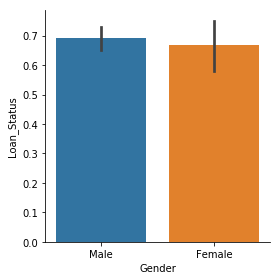

In [10]:
_ = sns.factorplot(x="Gender", y="Loan_Status", data=df, kind='bar')

## Marital Status

Next up: Marital Status. What effect does this have?

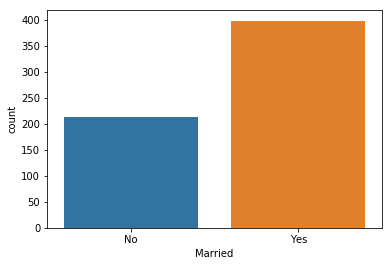

In [11]:
_ = sns.countplot(x=df['Married'])

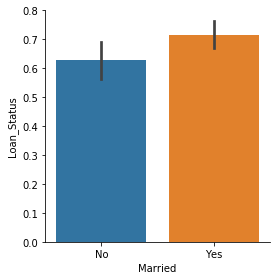

In [12]:
_ = sns.factorplot(x="Married", y="Loan_Status", data=df, kind='bar')

## Employee vs Freelance

What is the effect of employment type on loan acceptance?

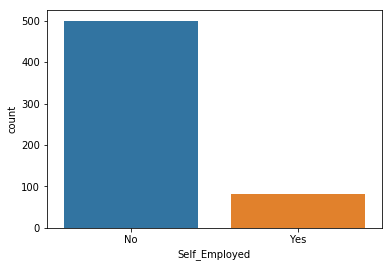

In [13]:
_ = sns.countplot(x=df['Self_Employed'])

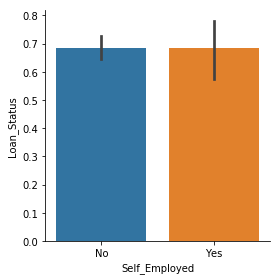

In [14]:
_ = sns.factorplot(x="Self_Employed", y="Loan_Status", data=df, kind='bar')

## Education

What is the effect of education on loan acceptance?

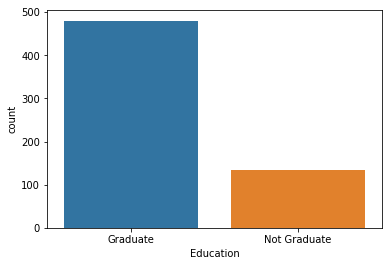

In [15]:
_ = sns.countplot(x=df['Education'])

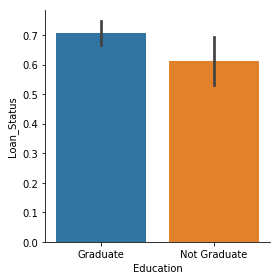

In [16]:
_ = sns.factorplot(x="Education", y="Loan_Status", data=df, kind='bar')

## Income and partner income

I'm curious about the effect of income and partner income on loan acceptance?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


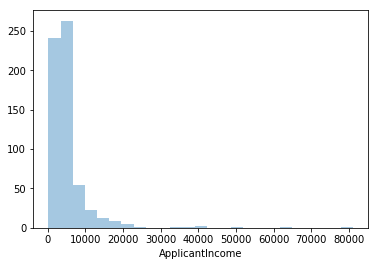

In [17]:
_ = sns.distplot(df['ApplicantIncome'], bins=25, kde=False)

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


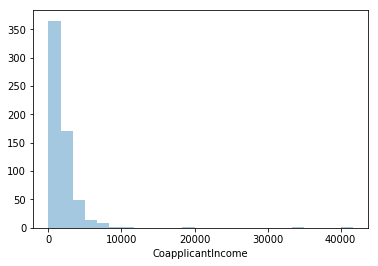

In [18]:
_ = sns.distplot(df['CoapplicantIncome'], bins=25, kde=False)

In [19]:
df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


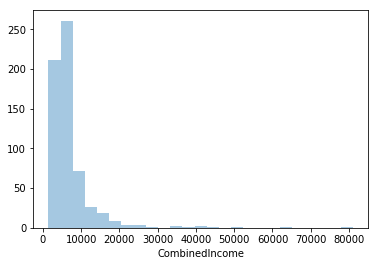

In [20]:
_ = sns.distplot(df['CombinedIncome'], bins=25, kde=False)

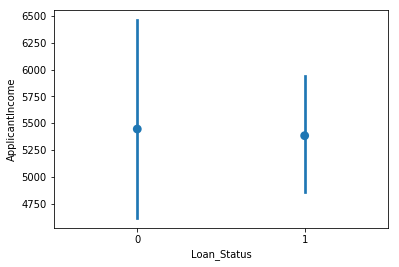

In [21]:
_ = sns.pointplot(x="Loan_Status", y="ApplicantIncome", data=df, join=False)

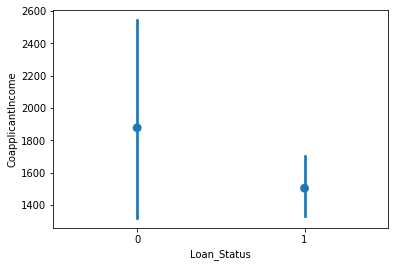

In [22]:
_ = sns.pointplot(x="Loan_Status", y="CoapplicantIncome", data=df, join=False)

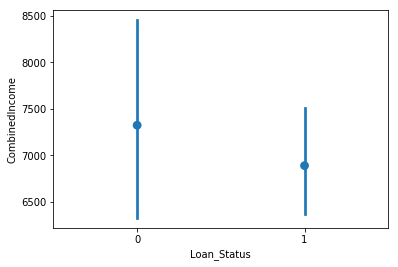

In [23]:
_ = sns.pointplot(x="Loan_Status", y="CombinedIncome", data=df, join=False)

## Property location

What is the effect of location of the property on loan acceptance?

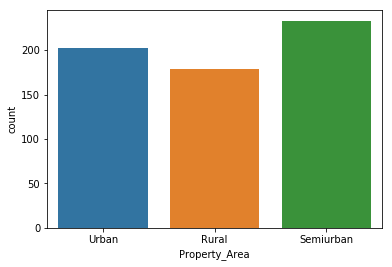

In [24]:
_ = sns.countplot(x=df['Property_Area'])

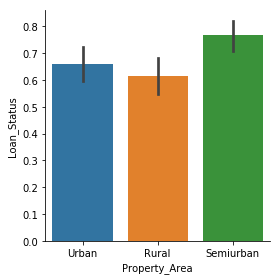

In [25]:
_ = sns.factorplot(x="Property_Area", y="Loan_Status", data=df, kind='bar')

## Credit history

How much do banks care about credit history?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


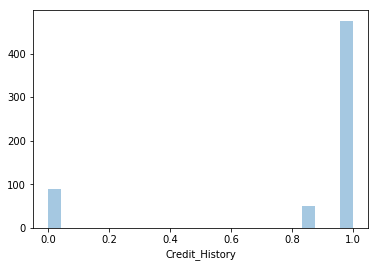

In [26]:
_ = sns.distplot(df['Credit_History'], kde=False)

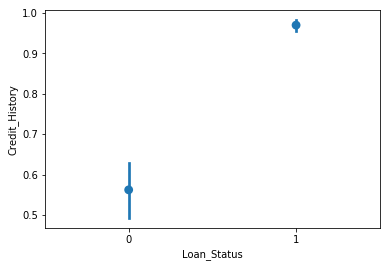

In [27]:
_ = sns.pointplot(x="Loan_Status", y="Credit_History", data=df, join=False)

## Loan Amount

Do banks approve lower or higher loans easier? What's the relation between loan amount and acceptance?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


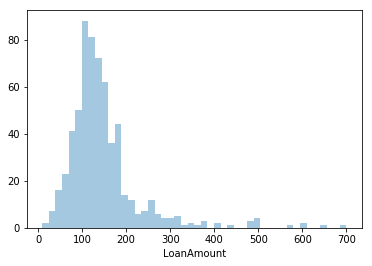

In [28]:
_ = sns.distplot(df['LoanAmount'], kde=False)

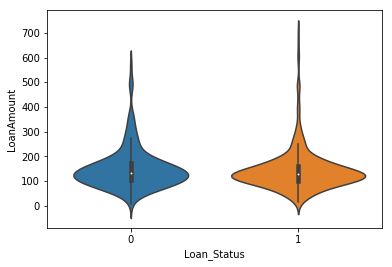

In [29]:
_ = sns.violinplot(x='Loan_Status', y='LoanAmount', data=df)

## Loan vs Salary

With a higher salary you might be able to loan more money more easily. Does this show from data?

In [30]:
df['LoanIncomeRatio'] = df['LoanAmount'] / df['CombinedIncome']

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


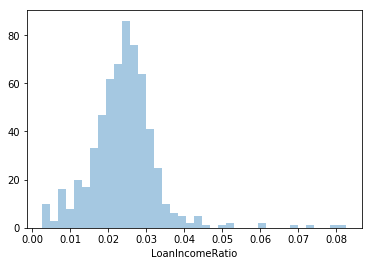

In [31]:
_ = sns.distplot(df['LoanIncomeRatio'], kde=False)

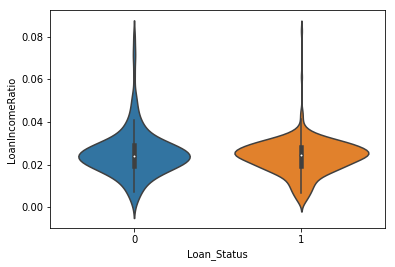

In [32]:
_ = sns.violinplot(x='Loan_Status', y='LoanIncomeRatio', data=df)

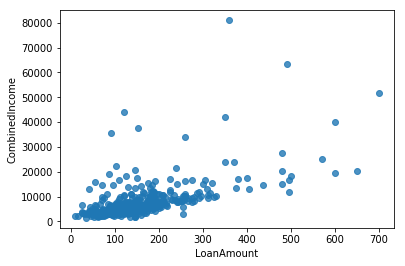

In [33]:
_ = sns.regplot(x='LoanAmount', y='CombinedIncome', data=df, fit_reg=False)

## Loan Status

Let's see how the target variable is distributed - what are we predicting?

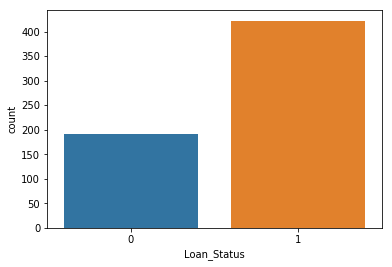

In [34]:
_ = sns.countplot(x=df['Loan_Status'])

## Preprocessing & feature engineering

Now we need to process the data to convert categorical to numbers etc..

In [35]:
df['Dependents'] = df['Dependents'].fillna(0.0)

In [36]:
from sklearn.preprocessing import LabelEncoder

df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])

In [37]:
df_enc = pd.get_dummies(df.drop(['Loan_Status'], axis=1), drop_first=True)

In [38]:
df_enc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CombinedIncome,LoanIncomeRatio,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,146.412162,360.0,1.0,5849.0,0.025032,1,0,1,0,0,0,0,0,0,1
LP001003,4583,1508.0,128.000000,360.0,1.0,6091.0,0.021015,1,1,0,1,0,0,0,0,0,0
LP001005,3000,0.0,66.000000,360.0,1.0,3000.0,0.022000,1,1,1,0,0,0,0,1,0,1
LP001006,2583,2358.0,120.000000,360.0,1.0,4941.0,0.024287,1,1,1,0,0,0,1,0,0,1
LP001008,6000,0.0,141.000000,360.0,1.0,6000.0,0.023500,1,0,1,0,0,0,0,0,0,1


## Predictive modelling effort

in this section we'll attempt predictive modelling. Can we predict whether a loan will be accepted from the other variables? This could give us insight into the kind of business rules being used by the bank.

In [39]:
X = df_enc
y = df['Loan_Status'].values

We defined the features and label (accepted or not) datasets. Lets see how some of the models do!

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

models = [
    LogisticRegression(),
    DecisionTreeClassifier(min_samples_split=10),
    RandomForestClassifier(n_estimators=500, min_samples_split=10),
    GradientBoostingClassifier(min_samples_split=10),
    LGBMClassifier(),
    SVC(),
    NuSVC(),
    LinearSVC()
]

for model in models:
    scores = cross_val_score(model, X, y, cv=StratifiedShuffleSplit(), scoring='roc_auc')
    print("Score [{}]: {:.4f} (+/- {:.4f})".format(model.__class__.__name__, scores.mean(), scores.std()))

Score [LogisticRegression]: 0.7749 (+/- 0.0682)
Score [DecisionTreeClassifier]: 0.7143 (+/- 0.0745)
Score [RandomForestClassifier]: 0.7841 (+/- 0.0624)
Score [GradientBoostingClassifier]: 0.7638 (+/- 0.0657)
Score [LGBMClassifier]: 0.7610 (+/- 0.0500)
Score [SVC]: 0.5416 (+/- 0.0335)
Score [NuSVC]: 0.5165 (+/- 0.0447)
Score [LinearSVC]: 0.5607 (+/- 0.0754)


So it looks like we can get around 80% accuracy with the best of these models. Let's train and evaluate one in more detail:

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Xt, Xv, yt, yv = train_test_split(X, y)

model = LGBMClassifier()
model.fit(Xt, yt)

ypred = model.predict(Xv)

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


We can look at the "classification report"

In [46]:
print(classification_report(yv, ypred, target_names=['Rejected', 'Accepted']))

             precision    recall  f1-score   support

   Rejected       0.68      0.51      0.58        41
   Accepted       0.84      0.91      0.87       113

avg / total       0.79      0.81      0.80       154



Also the confuision matrix tells us something about results

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff7409810b8>)

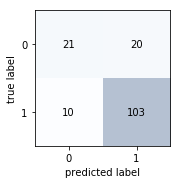

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(yv, ypred))

Looks like the rejected loans are harder to predict, only about half of them are predicted correctly. We might need to look into that, tune model parameters etc. The class imbalance might be related.

## Feature Importance

Final point of investigation is going to be feature importances. What kind of patterns have been leart? What variables impact the acceptance or rejection of a home loan?

In [43]:
clf = GradientBoostingClassifier(min_samples_split=10)
clf.fit(df_enc, df['Loan_Status'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
df_feat_imp = pd.DataFrame({'coefs': clf.feature_importances_}, index=df_enc.columns)
df_feat_imp = df_feat_imp.sort_values(by='coefs', ascending=False)

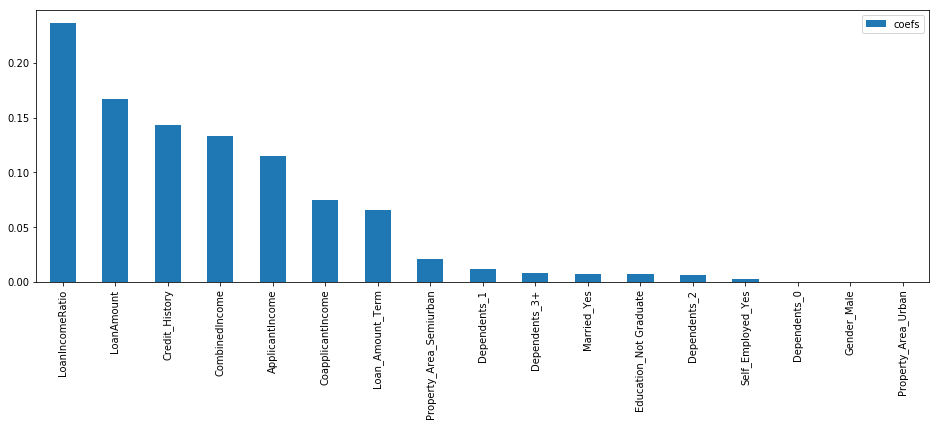

In [45]:
%matplotlib inline
_ = df_feat_imp.plot(kind='bar', figsize=(16, 5))